#### CSC 180 Intelligent Systems (Fall 2021)

#### Dr. Haiquan Chen, Dept of Computer Scicence

#### California State University, Sacramento



## Lab 14: Keras/TensorFlow Functional API and Model Visualization


The Sequential model API is great for developing deep learning models in most situations, but it also has some limitations. For example, it is not straightforward to define the following models:

* ### models with multiple different input sources
* ### model with multiple output destinations
* ### models that re-use layers.


## 1. Functional API Overview

https://www.tensorflow.org/guide/keras/functional


### 1. Defining Input layer

Unlike the Sequential model, you must ***create and define a standalone Input layer*** that specifies the shape of input data.

* The input layer takes a shape argument that is a tuple that indicates the dimensionality of the input data.

***When input data is one-dimensional,*** the shape must explicitly leave room for the shape of the mini-batch size used when splitting the data when training the network. Therefore, the shape tuple is always defined with a hanging last dimension when the input is one-dimensional (2,), for example:

In [1]:
from tensorflow.keras.layers import Input


visible = Input(shape=(2,))

### 2. Connecting all layers using "bracket notation"

#### The layers are connected pairwise using "bracket notation".

This is done by specifying where the input comes from when defining each new layer. A bracket notation is used, such that after the layer is created, the layer from which the input to the current layer comes from is specified.

Let’s make this clear with a short example. ***We can create the input layer as above, then create a hidden layer as a Dense that receives input only from the input layer.***

In [2]:
from tensorflow.keras.layers import Dense

hidden = Dense(2)(visible)

It is this way of connecting layers piece by piece that gives the functional API its flexibility. For example, you can see how easy it would be to start defining ad hoc graphs of layers.

### 3. After creating all of your model layers and connecting them together, you must define the model.

As with the Sequential API, the model is the thing you can summarize, fit, evaluate, and use to make predictions.

Keras provides a ***Model class that you can use to create a model*** from your created layers. 

***You need to only specify the input and output layers of your model.*** For example:

In [3]:
from tensorflow.keras.models import Model


visible = Input(shape=(2,))

hidden = Dense(2)(visible)

model = Model(inputs=visible, outputs=hidden)

In [4]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## 2. Standard Network Models
When getting started with the functional API, it is a good idea to see how some standard neural network models are defined.


### 1. Multilayer Model

Create a subfolder "plots" under the same folder of your notebook

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), 

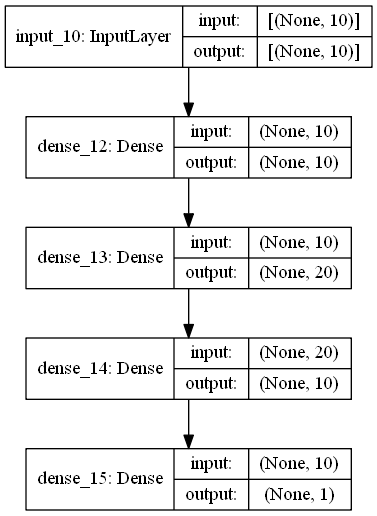

In [11]:
# Multilayer Perceptron

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import plot_model

visible = Input(shape=(10,))

hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='plots/multilayer_perceptron_graph.png', show_shapes=True)


from IPython.display import Image

Image(filename='plots/multilayer_perceptron_graph.png') 

### Note in this example,  we also use plot_model() to visualize the created model to understand/verify the dataflow inside the model. 

### 2. Convolutional Neural Network

In this section, we will define a convolutional neural network for image classification.

#### The model receives ***black and white 64×64 images as input***, then has a sequence of two convolutional and pooling layers as feature extractors, followed by a fully connected layer to interpret the features and an output layer with a sigmoid activation for two-class predictions.

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)              

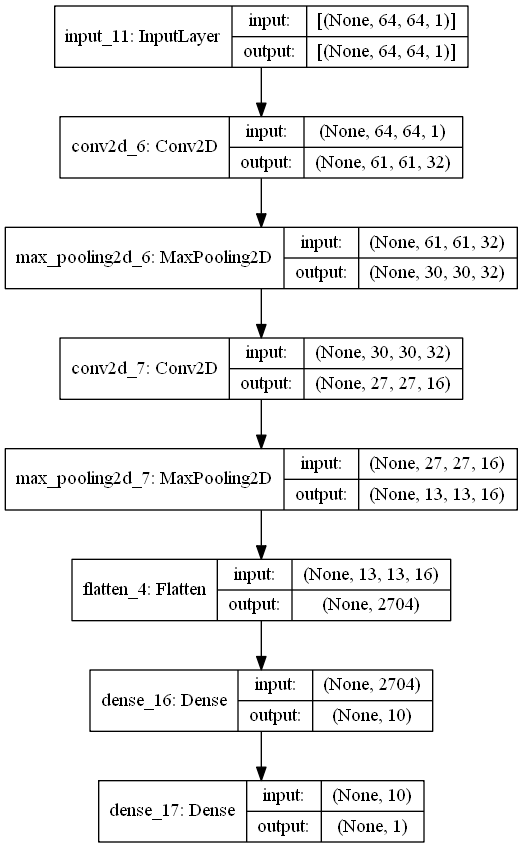

In [13]:
# Convolutional Neural Network
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


visible = Input(shape=(64,64,1))

conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)

hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='plots/convolutional_neural_network.png', show_shapes=True)

Image(filename='plots/convolutional_neural_network.png') 

### 3. Recurrent Neural Network
In this section, we will define a long short-term memory (LSTM) recurrent neural network for sequence classification.



![rnn](https://www.travelnursing.com/uploadedImages/StaffCare/Content/Resource_Center/Woman_putting_suitcase_in_car.jpg)



***The model expects 100 time steps of three feature as input***. The model has a single LSTM hidden layer to extract features from the sequence, followed by a fully connected layer to interpret the LSTM output, followed by an output layer for making binary predictions

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 100, 3)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                560       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________
None
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


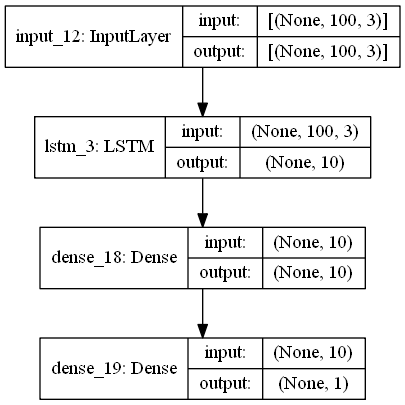

In [14]:
# Recurrent Neural Network
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

visible = Input(shape=(100,3))

hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='plots/recurrent_neural_network.png', show_shapes=True)

Image(filename='plots/recurrent_neural_network.png') 

## 3. Model with multiple layers reusing one layer.


For example, ***there may be multiple different feature extraction layers from an input***, or multiple layers used to interpret the output from a feature extraction layer.


In this section, we define multiple convolutional layers with differently sized kernels to interpret an image input.

* The model ***takes black and white images with the size 64×64 pixels.***  

* There are ***two CNN feature extraction submodels that share this input;***  The first has a kernel size of 4 and the second a kernel size of 8. 

* The outputs from these feature extraction submodels are ***concatenated into one long vector*** and passed on to a fully connected layer before a final output layer makes a binary classification.

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 61, 61, 32)   544         input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 57, 57, 16)   1040        input_14[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 30, 30, 32)   0           conv2d_12[0][0]                  
______________________________________________________________________________________

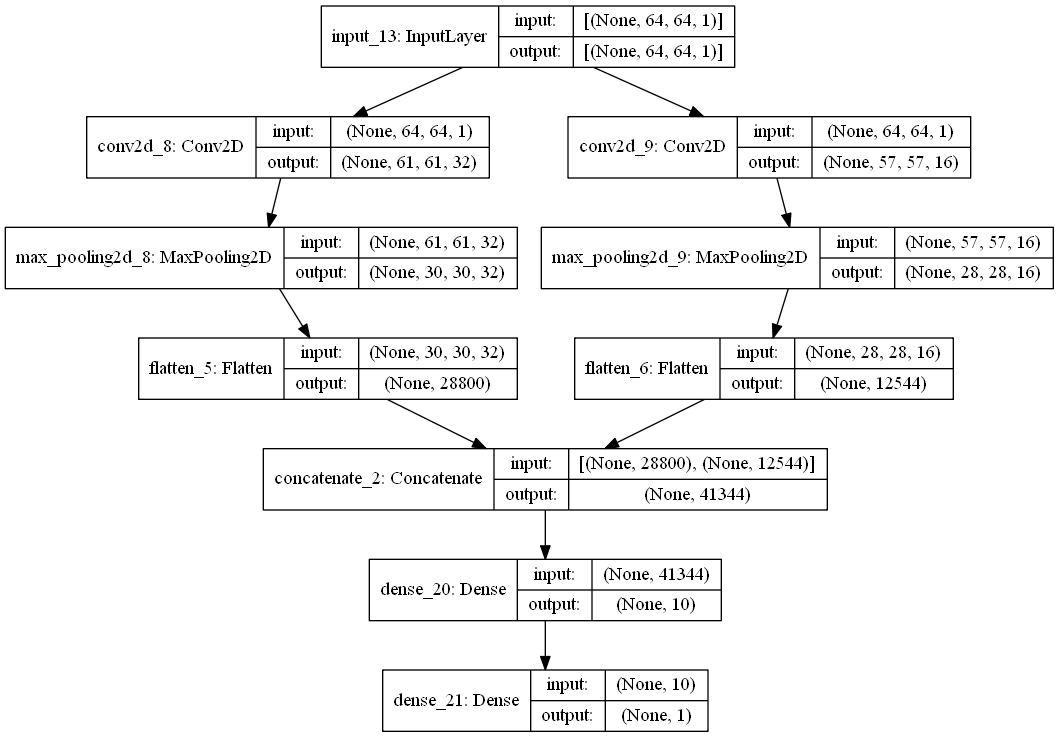

In [15]:
# Shared Input Layer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate

# input layer
visible = Input(shape=(64,64,1))

# first feature extractor
conv1 = Conv2D(32, kernel_size=(4,4), activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

# second feature extractor
conv2 = Conv2D(16, kernel_size=(8,8), activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)


# merge feature extractors
merge = concatenate([flat1, flat2])

# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation='sigmoid')(hidden1)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='plots/shared_input_layer.png', show_shapes=True)

Image(filename='plots/shared_input_layer.png') 

## 3. Models with multiple inputs and outputs

#### 1. Multiple Input Model:  

We will develop ***an image classification model that takes two versions of the image as input***, each of a different size. 

* Specifically ***a black and white 64×64 version and a color 32×32 version***. ***Separate feature extraction CNN models operate on each***, then ***the results from both models are concatenated*** for interpretation and ultimate prediction.

* Note that in the creation of the Model() instance, that we define the two input layers as an array. Specifically:

Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 61, 61, 32)   544         input_15[0][0]                   
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 29, 29, 32)   1568        input_16[0][0]                   
______________________________________________________________________________________

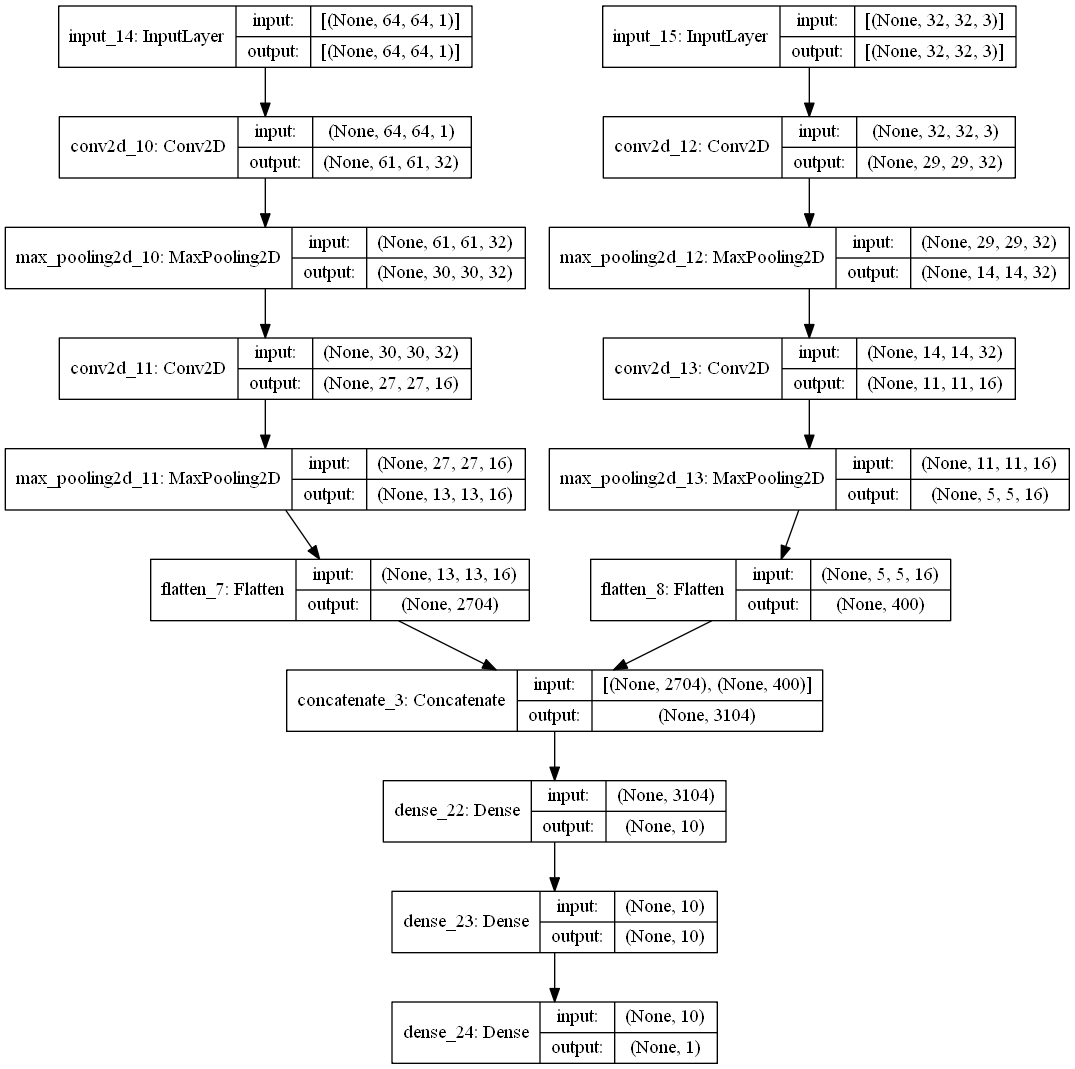

In [16]:
# Multiple Inputs
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate

# first input model
visible1 = Input(shape=(64,64,1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)


# second input model
visible2 = Input(shape=(32,32,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# merge input models
merge = concatenate([flat1, flat2])


# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)


model = Model(inputs=[visible1, visible2], outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='plots/multiple_inputs.png', show_shapes=True)

Image(filename='plots/multiple_inputs.png') 

### 2. Multiple Output Model
In this section, we will ***develop a model that makes two different types of predictions***. 



![m_i](https://fm-static.cnbc.com/awsmedia/chart/2018/8/14/AMZN_chart%20(1).1536940221501.jpeg?)



* Given an input sequence of 100 time steps of three features, the model will both classify the sequence and output a new sequence with the same length.

* The first output model creates a stacked LSTM, interprets the features, and makes a binary prediction. The second output model uses the same output layer to make a real-valued prediction for each input time step.

Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 100, 3)]     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 100, 10)      560         input_17[0][0]                   
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 10)           840         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 10)           110         lstm_2[0][0]                     
______________________________________________________________________________________

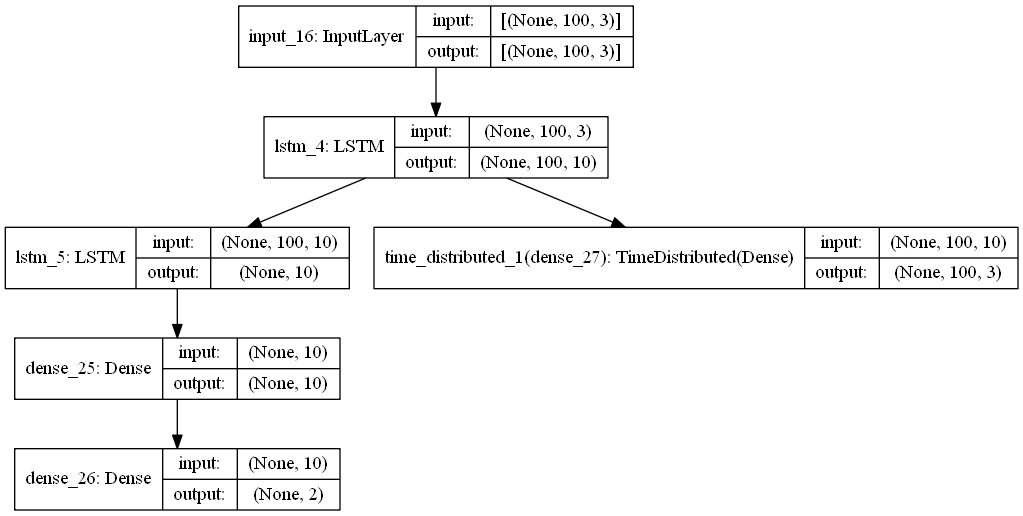

In [17]:
# Multiple Outputs

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed


# input layer
visible = Input(shape=(100,3))

# feature extraction for 100 time steps
extract = LSTM(10, return_sequences=True)(visible)

# classification output
class11 = LSTM(10)(extract)
class12 = Dense(10, activation='relu')(class11)
output1 = Dense(2, activation='softmax')(class12)

# sequence output for 100 time steps
output2 = TimeDistributed(Dense(3, activation='linear'))(extract)

# output
model = Model(inputs=visible, outputs=[output1, output2])

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='plots/multiple_outputs.png', show_shapes=True)

Image(filename='plots/multiple_outputs.png') 


## More complex models:

### 1. Visual question answering model

How to build a model that ***outputs a one-word answer when asked a natural-language question about a picture?***

It works by encoding the question into a vector, encoding the image into a vector, concatenating the two, and send that data to dense layers.

![exa1](https://www.petmd.com/sites/default/files/introduce-dog-to-cat.jpg)


Model: "functional_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 256)     2560000     input_19[0][0]                   
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 256)          525312      embedding[0][0]                  
______________________________________________________________________________________

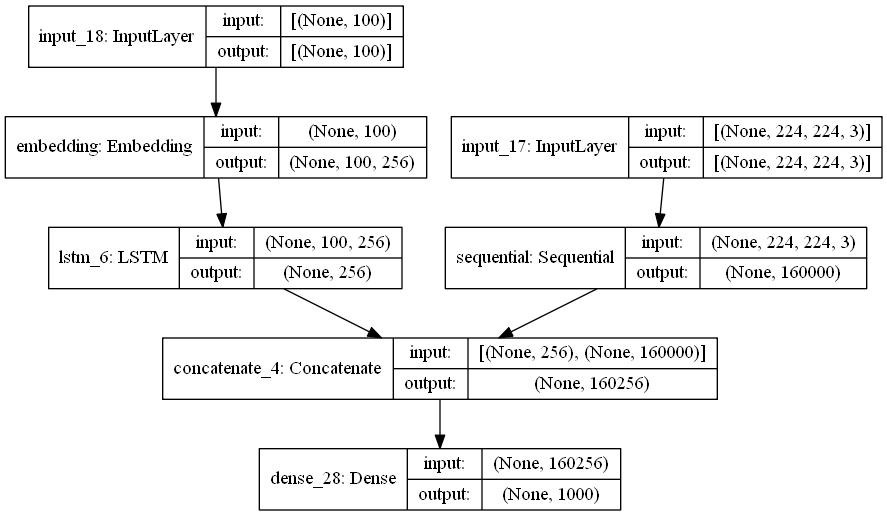

In [18]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import concatenate

# First, let's define a vision model using a Sequential model.
# This model will encode an image into a vector.

vision_model = Sequential()
vision_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
vision_model.add(Conv2D(64, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(128, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Flatten())

# Now let's get a tensor with the output of our vision model:
image_input = Input(shape=(224, 224, 3))

encoded_image = vision_model(image_input)

# Next, let's define a language model to encode the question into a vector.
# Each question will be at most 100 word long,
# and we will index words as integers from 1 to 9999.

question_input = Input(shape=(100,), dtype='int32')

# Next we use Embedding to turns integers (indexes) into dense vectors of fixed size. 
# You may think about Embedding layer as one hot encoding followed by a dense layer
# input_dim = vocabulary size
# input_length: Length of input sequences,
    
embedded_question = Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
encoded_question = LSTM(256)(embedded_question)

# Let's concatenate the question vector and the image vector:
merged = concatenate([encoded_question, encoded_image])

# And let's train a logistic regression over 1000 words on top:
output = Dense(1000, activation='softmax')(merged)

# This is our final model:
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# summarize layers
print(vqa_model.summary())

# plot graph
plot_model(vqa_model, to_file='plots/visual_question_answering.png', show_shapes=True)

Image(filename='plots/visual_question_answering.png') 

### 2. Video question answering model


***Now that we have trained our image QA model, we can quickly turn it into a video QA model.***  With appropriate training, you will be able to show it a short video (e.g. 100-frame human action) and ask a natural language question about the video (e.g. "what sport is the boy playing?" -> "soccer").

![exa2](http://www.animatedimages.org/data/media/165/animated-football-and-soccer-image-0093.gif)


Model: "functional_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 100, 224, 22 0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 100, 160000)  1735488     input_20[0][0]                   
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 256)     2560000     input_21[0][0]                   
______________________________________________________________________________________

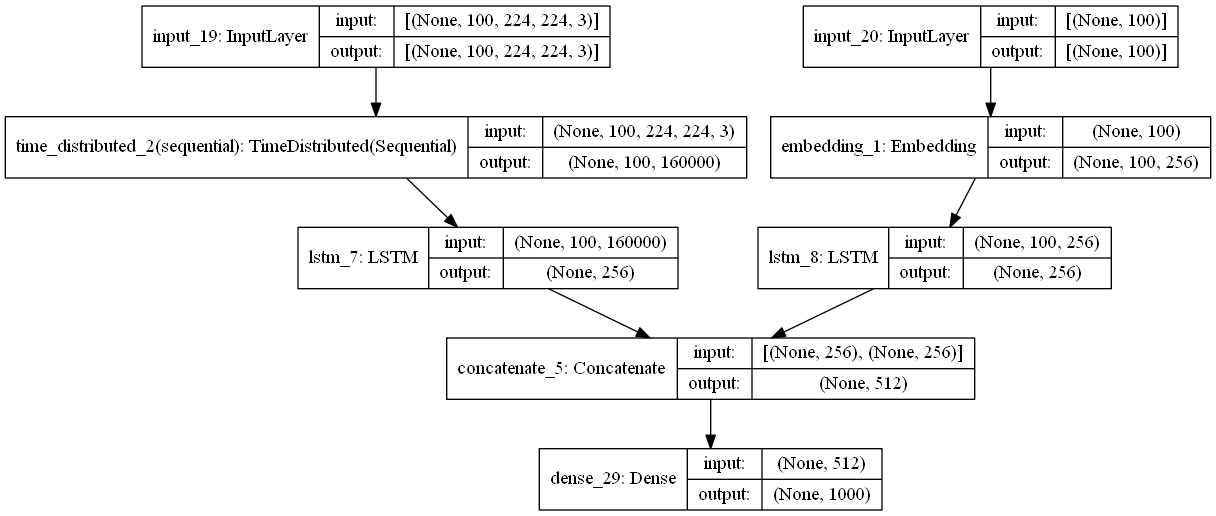

In [19]:
from tensorflow.keras.layers import TimeDistributed

video_input = Input(shape=(100, 224, 224, 3))

# This is our video encoded via the previously trained vision_model (weights are reused)
encoded_frame_sequence = TimeDistributed(vision_model)(video_input)  # the output will be a sequence of vectors
encoded_video = LSTM(256)(encoded_frame_sequence)  # the output will be a vector



question_input = Input(shape=(100,), dtype='int32')

# Next we use Embedding to turns integers (indexes) into dense vectors of fixed size. 
# You may think about Embedding layer as one hot encoding followed by a dense layer
# input_dim = vocabulary size
# input_length: Length of input sequences,
    
embedded_question = Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
encoded_question = LSTM(256)(embedded_question)



# And this is our video question answering model:
merged = concatenate([encoded_video, encoded_question])
output = Dense(1000, activation='softmax')(merged)

video_qa_model = Model(inputs=[video_input, question_input], outputs=output)

# summarize layers
print(video_qa_model.summary())

# plot graph
plot_model(video_qa_model, to_file='plots/video_question_answering.png', show_shapes=True)

Image(filename='plots/video_question_answering.png') 

#### Super Super Cool, right?